### Data transformation and visualiztion note book
#### Section micro

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# get the data
a = pd.read_csv('data/forReview_RAoctB.csv')

In [3]:
# this is "record data" each row corresponds to an event:
### each event is a water sample from a location on particular day
#### for each event there are three samples, those three samples get split between three agar plates
##### each plate can have a total result of x_total = x1 + x2 +...+ x6
###### x1 ... x6 are subtotals that can be compared across dates and/or locations
# do the steps to get the descriptive statistics
# create output that can be used by : javaScript, django, bokeh
### at a granularity appropriate to establish an accurate assesment of the laboratory results
a_cols = list(a.columns)
def print_this_list(a):
    for x in a:
        print(x)
print(a_cols)
#check the columns

['Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation', 'P1_qty_sample', 'Image_24h_fluo_plate_one', 'P1_fluo_halo_colonies', 'P1_fluo_other', 'Plate_one_24h_image', 'P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other', 'Comments_p1_24h', 'Plate_one_48h_image', 'P1_48h_big_blue', 'P1_48h_med_blue', 'P1_48h_green', 'P1_48h_turq', 'P1_48h_pink', 'P1_48h_other', 'Comments_p1_48h', 'P2_qty_sample', 'Image_24h_fluo_plate_two', 'P2_fluo_halo_colonies', 'P2_fluo_other', 'Plate_two_24h_image', 'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other', 'Comments_p2_24h', 'Plate_two_48h_image', 'P2_48h_big_blue', 'P2_48h_med_blue', 'P2_48h_green', 'P2_48h_turq', 'P2_48h_pink', 'P2_48h_other', 'Comments_p2_48h', 'P3_qty_sample', 'Image_24h_fluo_plate_three', 'p3_fluo_halo_colonies', 'p3_fluo_other', 'Plate_three_24h_image', 'P3_24h_big_blue', 'P3_24h_med_blu

In [4]:
# go in a terminal and check the date column
# it is in %y%.m%.d format
# for whatever reason the pd,datetime did not recoginze the data 17.06.12
# it flipped it to : 17.12.06 ---- which wont work
# so use some list index and str properties to make this right
b = a['Date'].copy()
new_dates = []
new_dic = {}
for x in b:
    year = '20'+str(x[6:])
    day = x[:2]
    month = x[3:5]
    new_d = year + '/' + str(month) + '/' + str(day)
    new_dates.append({x:new_d})
    new_dic.update({x:new_d})
new_dates[:10]

a['Date'] = a['Date'].map(new_dic)
a['Date'][:10]

0    2017/06/12
1    2017/06/12
2    2017/06/12
3    2017/06/12
4    2017/06/12
5    2017/06/12
6    2017/06/19
7    2017/06/19
8    2017/06/19
9    2017/06/19
Name: Date, dtype: object

In [5]:
# So there are alot of columns here
# index will be
# 'Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation',
# I want that with each record for now

plate_one = ['P1_qty_sample',
             'Image_24h_fluo_plate_one',
             'P1_fluo_halo_colonies',
             'P1_fluo_other',
             'Plate_one_24h_image',
             'P1_24h_big_blue',
             'P1_24h_med_blue',
             'P1_24h_green',
             'P1_24h_turq',
             'P1_24h_pink',
             'P1_24h_other',
             'Comments_p1_24h',
             'Plate_one_48h_image',
             'P1_48h_big_blue',
             'P1_48h_med_blue',
             'P1_48h_green',
             'P1_48h_turq',
             'P1_48h_pink',
             'P1_48h_other',
             'Comments_p1_48h']

In [6]:
plate_two = ['P2_qty_sample',
             'Image_24h_fluo_plate_two',
             'P2_fluo_halo_colonies',
             'P2_fluo_other',
             'Plate_two_24h_image',
             'P2_24h_big_blue',
             'P2_24h_med_blue',
             'P2_24h_green',
             'P2_24h_turq',
             'P2_24h_pink',
             'P2_24h_other',
             'Comments_p2_24h',
             'Plate_two_48h_image',
             'P2_48h_big_blue',
             'P2_48h_med_blue',             
             'P2_48h_green',
             'P2_48h_turq',
             'P2_48h_pink',
             'P2_48h_other',
             'Comments_p2_48h']

In [7]:
plate_three = ['P3_qty_sample',
               'Image_24h_fluo_plate_three',
               'p3_fluo_halo_colonies',
               'p3_fluo_other',
               'Plate_three_24h_image',
               'P3_24h_big_blue',
               'P3_24h_med_blue',
               'P3_24h_green',
               'P3_24h_turq',
               'P3_24h_pink',
               'P3_24h_other',
               'Comments_p3_24h',
               'Plate_three_48h_image',
               'P3_48h_big_blue',
               'P3_48h_med_blue',
               'P3_48h_green',
               'P3_48h_turq',
               'P3_48h_pink',
               'P3_48h_other',
               'Comments_p3_48h'] 

In [8]:
map_it = ['Location','latitude', 'longitude']

In [9]:
index = ['Date',
         'Location',
         'medium',
         'Samples',
         'Sampling_Notes',
         'Water_temp',
         'Plating_notes',
         'Temp_incubation',]

In [10]:
# so the info repeats it self for each plate
# set up lists and variables to keep track of all that
# make sure that all the column names are accounted for
# we have yet to account for 'location_image'
def count_it(a):
    n = 0
    for x in a:
        a = len(x)
        n += a
    return n
groups = [index, map_it, plate_one, plate_two, plate_three]
print(count_it(groups), len(a_cols))
# the count works because the column 'location image' is not included

71 71


In [11]:
loc_image = ['Date', 'Location', 'Location_Image']
groups.append(loc_image)
print(count_it(groups), len(a_cols))
#should be plus three

74 71


In [12]:
# okay onwards
# break the results into time scale (beacuase i can)
# the info repeats it self
# this should get dwon to a series of lists
# if executed in right sequence as variables 
# will extract all possible combinations of the data provided
plate_one_24 = ['P1_qty_sample',
                'Plate_one_24h_image',
                'P1_24h_big_blue',
                'P1_24h_med_blue',
                'P1_24h_green',
                'P1_24h_turq',
                'P1_24h_pink',
                'P1_24h_other',
                'Comments_p1_24h',]
             
plate_one_48 = ['P1_qty_sample',
                'Plate_one_48h_image',
                'P1_48h_big_blue',
                'P1_48h_med_blue',
                'P1_48h_green',
                'P1_48h_turq',
                'P1_48h_pink',
                'P1_48h_other',
                'Comments_p1_48h']


In [13]:
# these can also be constructed using a list index method
plate_two_24 = ['P2_qty_sample',
                'Plate_two_24h_image',
                'P2_24h_big_blue',
                'P2_24h_med_blue',
                'P2_24h_green',
                'P2_24h_turq',
                'P2_24h_pink',
                'P2_24h_other',
                'Comments_p2_24h']

plate_two_48 = ['P2_qty_sample',
                'Plate_two_48h_image',
                'P2_48h_big_blue',
                'P2_48h_med_blue',             
                'P2_48h_green',
                'P2_48h_turq',
                'P2_48h_pink',
                'P2_48h_other',
                'Comments_p2_48h']

In [14]:
plate_three_24 = ['P3_qty_sample',
                  'Plate_three_24h_image',
                  'P3_24h_big_blue',
                  'P3_24h_med_blue',
                  'P3_24h_green',
                  'P3_24h_turq',
                  'P3_24h_pink',
                  'P3_24h_other',
                  'Comments_p3_24h',]
               
plate_three_48 = ['P3_qty_sample',
                  'Plate_three_48h_image',
                  'P3_48h_big_blue',
                  'P3_48h_med_blue',
                  'P3_48h_green',
                  'P3_48h_turq',
                  'P3_48h_pink',
                  'P3_48h_other',
                  'Comments_p3_48h']

In [15]:
plate_one_fluo = ['Image_24h_fluo_plate_one',
                  'P1_fluo_halo_colonies',
                  'P1_fluo_other']
plate_two_fluo = ['Image_24h_fluo_plate_two',
                  'P2_fluo_halo_colonies',
                  'P2_fluo_other']
plate_three_fluo = ['Image_24h_fluo_plate_three',
                    'p3_fluo_halo_colonies',
                    'p3_fluo_other']

In [16]:
# test the list indexes:
d = np.random.randint(9, size=8)
d

array([3, 8, 6, 4, 8, 3, 1, 7])

In [17]:
# or run this at each loop
np.random.choice(9)

6

In [18]:
# this data can be seen as a whole (the sum of all the xis or seperated by incubation time)
plate_groups = [plate_one_24, plate_two_24, plate_three_24, plate_one_48, plate_two_48, plate_three_48]
plate_24 = plate_groups[:3]
plate_48 = plate_groups[3:]

In [19]:
# to check this i will grab a random number and sue it to
# index the lists created from the columns
# these will be used as lables later to call data out
# the out pt should be the same for all values x[i] where i = np.random.choice(9)

def check_indexes(a):
    n = 0
    i = np.random.choice(9)
    if n <= 4:        
        for x in a:
            print(x[i])
        print('loop')
        n += 1
        
check_indexes(plate_groups)
# okay this function can run forever and i get the same output from each group         
        

P1_24h_med_blue
P2_24h_med_blue
P3_24h_med_blue
P1_48h_med_blue
P2_48h_med_blue
P3_48h_med_blue
loop


In [20]:
# group the dates by week number
# first get a sorted list by date
# any way you do it there is a transformation to happen
b = a['Date'].copy()
b = pd.to_datetime(b, format='%Y/%m/%d')
b = list(b)
b.sort()
b = list(set(b))
b.sort()
b
# the time stamp works here but it is a hassel in js
# the value will be kept but I will also asign a week no

[Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2017-07-31 00:00:00')]

In [21]:
weeks_l = ['Week one', 'Week two', 'Week three', 'Week four', 'Week five', 'Week six', 'Week seven', 'Week eight']
weeks = dict(zip(weeks_l, b))
print(weeks, b)

{'Week one': Timestamp('2017-06-12 00:00:00'), 'Week two': Timestamp('2017-06-19 00:00:00'), 'Week three': Timestamp('2017-06-26 00:00:00'), 'Week four': Timestamp('2017-07-03 00:00:00'), 'Week five': Timestamp('2017-07-10 00:00:00'), 'Week six': Timestamp('2017-07-17 00:00:00'), 'Week seven': Timestamp('2017-07-24 00:00:00'), 'Week eight': Timestamp('2017-07-31 00:00:00')} [Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-31 00:00:00')]


In [22]:
# makesure the orignal df is up to speed
a['Date'] = pd.to_datetime(a['Date'],format='%Y/%m/%d' )

In [23]:
# create a list of place names
places = list(a['Location'].copy())
places = set(places)
place = list(places)
place

['Hackuarium toilet',
 'MRD',
 'SVT',
 'VNX',
 'Hackuarium tap',
 'Echandens',
 'Nernier']

In [24]:
mediums = list(a['medium'].unique().copy())
mediums[0]

'easy_gel'

In [25]:
place = ['Echandens',
         'SVT',
         'VNX',
         'MRD',
         'Nernier',
         'Hackuarium tap',
         'Hackuarium toilet']

# so now I should get a table of values
# corresponding to plate number and color for one date, and one location
# check to see what happens if use 1 of each list to slice the data-frame
c = a[(a.Location == place[4]) & (a.Date == weeks['Week one'])][[plate_one_24[2], plate_two_24[2], plate_three_24[2]]]

In [26]:
c

,P1_24h_big_blue,P2_24h_big_blue,P3_24h_big_blue
4,1.0,0.0,0.0


In [27]:
print(type(c))
# that output looks good
# create a list index for the plate counts
bugs = [2, 3, 4, 5, 6, 7]
# this is temporary and will be replaced with a list derived from the column names
# this information down here is good to know

<class 'pandas.core.frame.DataFrame'>


In [28]:
# there is already some pandas functionality here
a_sum = c.sum()
b_sum = sum(a_sum)
c_sum = sum(c.sum())

print(c_sum)
print(a_sum)

1.0
P1_24h_big_blue    1.0
P2_24h_big_blue    0.0
P3_24h_big_blue    0.0
dtype: float64


In [29]:
# now I can start to get descriptive statistics and visualisations
# seperated by date, location, incubation time, plate number, color
# and have output that is almost ready to go for charting (js date and float parse on the browser)
# but is good for plotting in matplotlib
#g

In [30]:
plate_48 = [plate_one_48, plate_two_48, plate_three_48]

In [31]:
cc = [plate_48, plate_24]
big_blue, med_blue, green, turq, pink, other = [], [], [], [], [], []
for x in cc:
    for plate in x:        
        big_blue.append(plate[2])
        med_blue.append(plate[3])
        green.append(plate[4])
        turq.append(plate[5])
        pink.append(plate[6])
        other.append(plate[7])
#big_blue         

In [32]:
#b is our list of dates
dates = b
all_colors = [big_blue, med_blue, green, turq, pink, other]

In [33]:
one_sample = [[big_blue[3],big_blue[0]],
              [med_blue[3], med_blue[0]],
              [green[3], green[0]],
              [turq[3], turq[0]],
              [pink[3], pink[0]],
              [other[3], other[0]]
             ] 

#one_sample

In [34]:
#all_colors

In [35]:
weeks_2 = dict(zip(b, weeks_l))

In [36]:
a.drop(12, inplace=True)

In [37]:
rows = len(dates)
cols = len(place) + 1
ind = np.arange(len(one_sample))
width = 1
colss = ['r', 'b', 'y', 'g', 'r', 'b']

#f, axar = plt.subplots(rows, cols, figsize=(18,14))
#f.subplots_adjust(hspace=0.6, wspace=0.3)
all_results = []
for n, beach in enumerate(place[:4]):
    chart_it = {beach:[]}
    the_results = []
    for i, date in enumerate(dates):        
        xx = a[(a.Date == date) & (a.Location == beach ) & (a.medium == 'easy_gel')]
        day_results = []
        for n, sample in enumerate(all_colors):
#             if sum(xx[sample].sum()) == 0:
#                 f_95 = 0
#             else:
            yy = list(xx[sample].sum())
            yr = []
            for d in yy:
                if d == 0:
                    yr.append(d)
                if d > 0:
                    yr.append(np.log(d))
#                 print(yy)
#                 yy = yy.apply(np.log)
#                 print(yy)
            yg = np.mean(yr)
            yh = np.std(yr)
            f_95 = yg+yh*1.649
            f_95 = np.exp(f_95).round(2)
            if xx[plate_one[0]].item() == 0.5:
                f_95 = f_95 * 200
            elif xx[plate_one[0]].item() == 1:
                f_95 = f_95 * 100
            elif xx[plate_one[0]].item() == 4:
                f_95 = f_95 * 25
            #print(beach,sample[0][7:], sum(yy))
            day_results.append(f_95)
            #w = day_results
            #name.append(beach)
            #vv = {beach:}
        #print(weeks_l[i], day_results)
        the_results.append({weeks_2[date]:day_results})
    chart_it[beach] = the_results
    all_results.append(chart_it)
    #print(chart_it)

In [41]:
def plot_weekly_totals(x):
    rows = len(weeks_l)
    cols = len(x) +1
    ind = np.arange(6)
    width = 1
    colss = ['r', 'b', 'y', 'g', 'r', 'b']

    f, axar = plt.subplots(rows, cols, figsize=(18,14))
    f.subplots_adjust(hspace=0.6, wspace=0.3)

    for i, n in enumerate(x):
        if i == 0:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    axar[j, i+1].bar(ind, k[weeks_l[j]], width, color=colss)
                    axar[j, i+1].set_title(key)
                    axar[j, i+1].set_ylim(0, max(k[weeks_l[j]]) + 10)
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
#                     axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
#                     axar[j, i].set_axis_off()
                    axar[j, i+1].bar(ind, k[weeks_l[j]], width, color=colss)
                    axar[j, i+1].set_title(key)
                    axar[j, i+1].set_ylim(0,max(k[weeks_l[j]]) + 10)
            
    plt.show()

In [42]:
#all_results

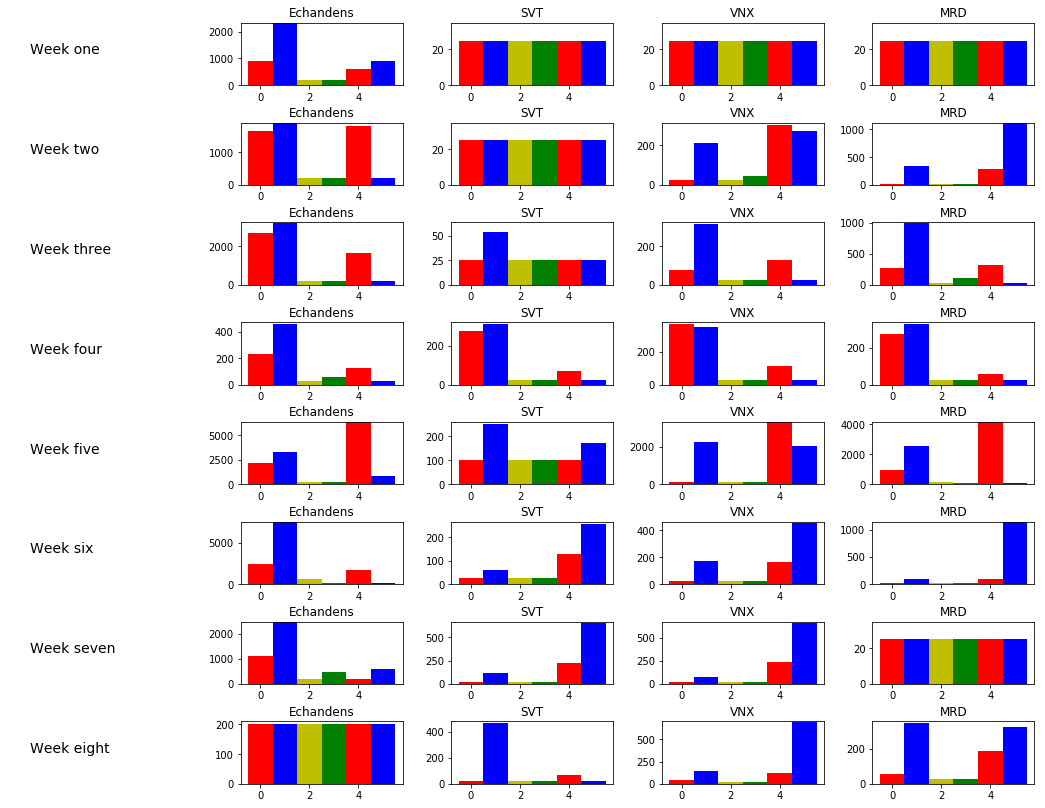

In [43]:
plot_weekly_totals(all_results)

In [44]:
def averages(df, date, places, medium, one_sample, two_sample, three_sample):
    for day in date:
        total = 0
        average = 0
        nine_5 = 0
        for place in places:
            if place in list(df[(df.date == day)]['Location']):
                record = df[(df.Date == day) & (df.Location == places) & (df.medium == medium)]
                if record['Samples'].item() == 1:
                    # then list 'one_sample" has the columns
                    for sample in one_sample:
                        a = record[sample]
                        total += sum(a.sum())
                        average += np.mean(a.sum())
                elif record['Samples'].item() == 2:
                    # then list 'two_sample' has the columns
                    for sample in two_sample:
                        a = record[sample]
                        total += sum(a.sum())
                        total += sum(a.sum())
                        average += np.mean(a.sum())
                elif record['Samples'].item() == 3:
                    # then list 'three_sample' has the columns
                    for sample in three_sample:
                        a = record[sample]
                        total += sum(a.sum())
                        average += np.mean(a.sum())
                
        
        
             
            
    
        for color in colony:
            a = df[(df.Date == day) & (df.Location == places) & (df.medium == medium)][color].copy()
            total += sum(a.sum())
            #print(a.sum())
            #print('count per plate')
            #print(day,places, medium, color[0])
            #print(a.sum())
            print('average below')
            total2 += np.mean(a.sum())
            print(day,places, medium, color[0][7:], np.mean(a.sum()))
        b = {(places, day):total2}
        print(b)
        print('loop')
            
        
#averages(a, dates, place[2], 'easy_gel', all_colors)

In [45]:
for i, x in enumerate(all_results[:1]):
    for key, value in all_results[i].items():
        for qu, oy in enumerate(value):
            print(value[qu])

{'Week one': [914.0, 2316.0, 200.0, 200.0, 590.0, 914.0]}
{'Week two': [1657.9999999999998, 1912.0, 200.0, 200.0, 1830.0, 200.0]}
{'Week three': [2702.0, 3215.9999999999995, 200.0, 200.0, 1657.9999999999998, 200.0]}
{'Week four': [234.0, 463.25, 25.0, 54.0, 127.25, 25.0]}
{'Week five': [2136.0, 3264.0, 200.0, 200.0, 6322.0, 810.0]}
{'Week six': [2454.0, 7512.0, 678.0, 200.0, 1736.0, 200.0]}
{'Week seven': [1114.0, 2472.0, 200.0, 472.0, 200.0, 590.0]}
{'Week eight': [200.0, 200.0, 200.0, 200.0, 200.0, 200.0]}


In [46]:
all_results[1].key.value()

AttributeError: 'dict' object has no attribute 'key'